In [1]:
import pandas as pd
import numpy as np

#pd.options.plotting.backend = "matplotlib"
pd.options.plotting.backend = "plotly"

In [2]:
df = pd.read_csv("YijinXRD.dat", sep = '\t')
qq = df.iloc[:, 0]

patterns = df.iloc[:, 2:]
patterns = (patterns.values.T)[:, 1:]

for i in range(len(patterns)):
    patterns[i] = patterns[i] - i * 1000
    
#patterns = np.vstack((patterns[0][None, :], patterns))

In [3]:
from scipy.fft import fft, fftfreq, ifft, fft2, ifft2, ifftshift
from scipy.signal import blackman
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
from scipy.signal import butter
from scipy import signal
from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration
from scipy.ndimage import gaussian_filter as gf

from xrdc import featurization as feat
from xrdc import fourier

In [4]:
# def plot_df(*args):
#     df = pd.DataFrame([p for p, _ in args]).T
#     df.columns = [l for _, l in args ]
#     return df.plot()

# def lowpass_g(size, y):
#     gwindow = signal.gaussian(len(y), std = size)
#     L = power(fftshift(fft(gwindow)))
#     L /= L.max()
#     return L

# def clip_high(x, frac_zero):
#     x2  = x.copy()
#     mask = clip_high_filter(x, frac_zero)
#     return x2 * mask

# def clip_high_window(x, frac_zero):
#     """ low pass filter
#     """
#     x = ifftshift(x)
#     N = len(x)
#     nz = int(frac_zero * N)
#     x2  = np.ones_like(x)
#     x2[(N - nz) // 2 : (N + nz) // 2] = 0
#     #x2[(-nz) // 2:] = 0
#     return fftshift(x2)

# def clip_low(x, frac_zero, invert = False, inc_window = False):
#     x2  = x.copy()
#     mask = clip_low_window(x, frac_zero, invert = invert, inc_window = inc_window)
#     return x2, mask

# def clip_low_window(x, frac_zero, invert = False, inc_window = False):
#     x = ifftshift(x)
#     N = len(x)
#     nz = int(frac_zero * N)
#     x2  = x.copy()
#     mask = np.ones_like(x)
#     mask[:( nz) // 2 ] = 0
#     mask[(-nz) // 2:] = 0
#     if inc_window:
#         window = np.blackman(N)
#         mask *= window
#     if invert:
#         mask = 1 - mask
#     return fftshift(mask)
        
# #     x2[:( nz) // 2 ] = 0
# #     x2[(-nz) // 2:] = 0
#     return x2, mask

# def highpass_g(size, y):
#     return 1 - lowpass_g(size, y)

# def if_mag(patterns, arr, phase = 0, truncate = False):
#     trunc = len(arr) - len(patterns[0])
#     phase = np.exp(1j * phase)
#     tmp = ifft(ifftshift(arr))
#     if truncate:
#         return np.real(np.sqrt(np.conjugate(tmp * phase) * tmp))[trunc // 2: -trunc // 2]
#     return np.real(np.sqrt(np.conjugate(tmp * phase) * tmp))

# def spec_fft(patterns, i, pad = 1000, roll = 0, do_conv_window = False, do_window = True, log = False, dat = None):
#     if dat is not None:
#         pi = dat
#     else:
#         pi = patterns[i]
#     if log:
#         y = np.pad(np.log(pi + 1), pad, mode = 'edge')
#     else:
#         y = np.pad(pi, pad, mode = 'edge')
#     y = np.roll(y, roll)
#     # Number of sample points
#     N = y.shape[0]
#     w = blackman(N)
#     #w = 1
#     #yf = fft(y * w)
#     if do_window:
#         ywf = fftshift(fft(y*w))
#     else:
#         ywf = fftshift(fft(y))
#     if do_conv_window:
#         ywf = conv_window(ywf)
#     return w, ywf

# def power(arr):
#     ampsq = arr * np.conjugate(arr)
#     return np.real(ampsq)

# def mag(x):
#     return np.sqrt(power(x))

# def lorenz(gamma, x, x0):
#     return ( 1. / (np.pi * gamma)) * (gamma**2) / ((x - x0)**2 + gamma**2)

# def do_rl(sig, window_width = 4, peak_width = 2, window_type = 'gaussian',
#          bwindow = None, norm = False):
#     if window_type == 'gaussian':
#         gwindow = signal.gaussian(len(y), std = window_width)
#         #gwindow = lorenz(peak_width, np.arange(len(sig)), len(sig) // 2)
#         L = power(fftshift(fft(gwindow)))
#         L /= L.max()
#         H = 1 - L
#     elif window_type == 'step':
#         H = clip_low_window(sig, .001) * bwindow
#     else:
#         raise ValueError
    
#     g = signal.gaussian(len(y), std = peak_width)
#     gfft = fftshift(fft(g))
    
#     psf = mag(ifft(gfft * H))[:, None].T
#     psf_1d = psf[:, 1275:1324]
#     deconvolved_RL = restoration.richardson_lucy((sig[:, None].T) / (10 * sig.max()), psf_1d, iterations=120)
#     if not norm:
#         return deconvolved_RL[0]
#     else:
#         return deconvolved_RL[0] / deconvolved_RL[0].mean()

# def conv_window(sig, mode = 'same'):
#     tmp = np.real(np.sqrt(fftshift(fft(window)) * np.conjugate(fftshift(fft(window)))))
#     return np.convolve(sig, tmp / tmp.max(), mode =mode)#if_mag(clip_low(ywf, .01) * window)

# def filter_bg(patterns, i, smooth = 1.5, window_type = 'gaussian', blackman = True,
#              deconvolve = False, invert = False):
#     cutoff = 4
#     window, ywf = spec_fft(patterns, i, 1000)
#     if window_type == 'gaussian': #todo inversion
#         sig = if_mag(patterns, highpass_g(cutoff, ywf) * ywf)
#     elif window_type == 'step': # hard step
#         clipped, mask = clip_low(ywf, .001, invert = invert)
#         if blackman:
#             if invert:
#                 window = 1 - window
#             mask *= window
#             sig = if_mag(patterns, clipped * window)
#         else:
#             sig = if_mag(patterns, clipped)
#     else:
#         raise ValueError
#     if deconvolve:
#         sig = do_rl(sig, cutoff, 2.2)
#     sig = gf(sig, smooth)
#     return sig[1000: -1000]#, mask[1000: -1000]

# from ipywidgets import interactive
# import matplotlib.pyplot as plt
# import numpy as np

# def iplot_rows(patterns, patterns2 = None, label1 = 'raw', label2 = 'curve fit subtraction',
#               log = False, offset = 0, height = '550px'):
#     plt.rcParams["figure.figsize"]=(12, 9)
#     def f(i):
#         if log:
#             plt.semilogy()
#         plt.plot(patterns[i] + offset, label = label1)
#         if patterns2 is not None:
#             plt.plot(patterns2[i] + offset, label = label2)
#         plt.legend()
#         plt.grid()

#     interactive_plot = interactive(f, i=(0, len(patterns)), step = 1)
#     output = interactive_plot.children[-1]
#     output.layout.height = height
#     return interactive_plot

# def logim(arr, offset = 1):
#     plt.imshow(np.log(offset + arr), cmap = 'jet')

In [5]:
# def mk_black2d(y2d, fraction):
#     N, M = y2d.shape
#     n = m = fraction
#     nwin, mwin = 2 * (int(n * N) // 2), 2 * (int(m * M) // 2)
#     w2d = blackman(nwin)[:, None] * blackman(mwin)
#     w2d = np.pad(w2d, (M - mwin) // 2)
#     w2d = np.sqrt(1e-9 + w2d)
#     trim = w2d.shape[0] - N
#     w2d = w2d[trim // 2: -trim // 2]
#     return w2d

# def clip_low2d(x, frac_zero):
#     N = len(x)
#     nz = int(frac_zero * N)
#     x2  = x.copy()
#     x2[:( nz) // 2 ] = 0
#     x2[(-nz) // 2:] = 0
#     return x2

# def spec_fft2(do_window = True):
#     if do_window:
#         ywf = fft2(y*w)
#     else:
#         ywf = fft2(y)
#     if do_conv_window:
#         ywf = conv_window(ywf)
#     return w, ywf

# def if_mag(patterns, arr, phase = 0, truncate = False):
#     trunc = len(arr) - len(patterns[0])
#     phase = np.exp(1j * phase)
#     tmp = ifft2(arr)
#     if truncate:
#         return np.real(np.sqrt(np.conjugate(tmp * phase) * tmp))[trunc // 2: -trunc // 2]
#     return np.real(np.sqrt(np.conjugate(tmp * phase) * tmp))

# def spec_separate(patterns, pad = None, i = 0, ftype = 'step', std = 4, cutoff = .9,
#         window_high = False):
#     """
#     separate signal into low and high-frequency components
#     """
#     N = len(patterns[0])
#     if pad is None:
#         pad = N
    
#     g = y = np.pad(patterns[i], pad, mode = 'edge')

#     window, ywf = spec_fft(patterns, i, pad)

    
#     if ftype == 'step':
#         L = clip_high_window(ywf, cutoff)
#         H = 1 - L
#     elif ftype == 'gaussian':
#         gwindow = signal.gaussian(len(y), std = std)

#         L = np.absolute(fftshift(fft(gwindow))) * window
#         L /= np.absolute(L).max()
#         H = 1 - L
#     else:
#         raise Exception
#     if window_high:
#         H = H * window
#     gfft = fftshift(fft(g))

    
#     low = np.real(ifft(ifftshift(gfft * L)))[pad: -pad]
#     high = np.real(ifft(ifftshift(gfft * H)))[pad: -pad]

#     return high, low, (g, gfft, H, L)

# def separate_2d(arr, **kwargs):
#     high = []
#     low = []
#     for i in range(len(arr)):
#         h, l, _ = spec_separate(arr, i = i, **kwargs)
#         high.append(h)
#         low.append(l)
#     return np.vstack(high), np.vstack(low)

# def reference_bgsub():
#     bgsubbed_nosmooth = np.vstack([fourier.filter_bg(
#     patterns, i, 0, window_type = 'step', deconvolve = False, toreal = 'psd')
#                                for i in range(len(patterns))])
#     bgsubbed_final = gf(bgsubbed_nosmooth, (1, 1.7))
#     bgsubbed_final *= patterns.max() / bgsubbed_final.max() #np.percentile(patterns, 99.9) / np.percentile(bgsubbed_final, 99.9)
#     return bgsubbed_final

In [6]:
# from scipy.interpolate import interp1d
# from scipy.interpolate import NearestNDInterpolator

# def interprows(arr, mask):
#     res = []
#     for row, rowmask in zip(arr, mask):
#         x = np.indices(row.shape)[0][rowmask]
#         y = row[rowmask]
#         f = interp1d(x, y, bounds_error = False)
#         res.append(f(np.indices(row.shape)[0]))
#     return np.vstack(res)

In [9]:
# def get_background(threshold = 50, smooth = (1, 1.7)):
#     bgsubbed = reference_bgsub()
#     bgsubbed[bgsubbed > np.percentile(bgsubbed, threshold)] = np.nan
#     bkgmask = ~np.isnan(bgsubbed)
#     filled_bg = interprows(patterns, bkgmask)
#     smooth_bg = gf(filled_bg, smooth)

#     mask = np.where(~np.isnan(smooth_bg))
#     interp = NearestNDInterpolator(np.transpose(mask), smooth_bg[mask])
#     filled_data = interp(*np.indices(smooth_bg.shape))
#     return filled_data

# def separate_signal():
#     filled_data = get_background()
#     # interpolation of slow-varying background
#     slow_q = get_background()
#     # crystalline diffraction + high-frequency noise (original data minus interpolated background)
#     fast_q = patterns - filled_data
#     # high-T frequency noise, low-T frequency signal
#     fast_T, slow_T = separate_2d(fast_q.T, ftype = 'gaussian', std = .5)
#     return slow_q, fast_q, slow_T, fast_T

# def imshow_log(arr):
#     """plot log of absolute value heatmap, with an offset
#     """
#     arr = arr.copy()
#     floor = np.abs(arr.min())
#     arr[arr < 0] = 0
#     plt.imshow(np.log(floor + arr ), cmap = 'jet')

Interpolated background:

In [4]:
from importlib import reload
from xrdc import source_separation as sep
reload(sep)

<module 'xrdc.source_separation' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/source_separation.py'>

In [5]:
slow_q, fast_q, slow_T, fast_T = sep.separate_signal(patterns)

In [6]:
plt.rcParams["figure.figsize"]=(12, 9)

Text(0.5, 1.0, 'raw signal')

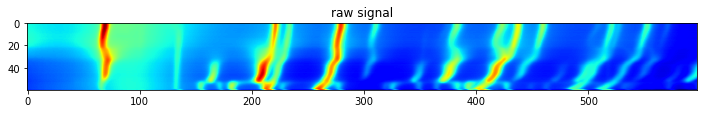

In [7]:
plt.imshow(np.log(1 + patterns), cmap = 'jet')
plt.title('raw signal')

Text(0.5, 1.0, 'Interpolated background')

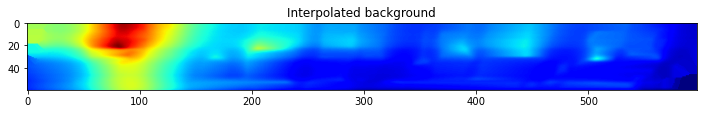

In [8]:
plt.imshow(slow_q, cmap = 'jet')
plt.title("Interpolated background")

In [9]:
imshow_log(slow_T.T)


NameError: name 'imshow_log' is not defined

In [10]:
imshow_log(fast_q)
plt.title("Background-subtracted signal")
plt.colorbar()

NameError: name 'imshow_log' is not defined

## high-T component

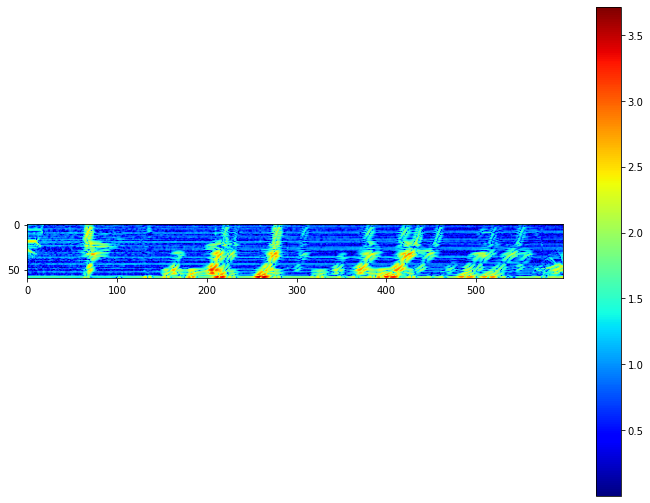

In [11]:
plt.imshow(np.log10(1 + np.abs(fast_T.T)), cmap = 'jet')
plt.colorbar()

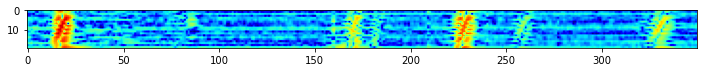

In [12]:
plt.imshow(np.log10(1 + np.abs(fast_T.T)[:20, 50:400]), cmap = 'jet')

Fast T (unscaled)

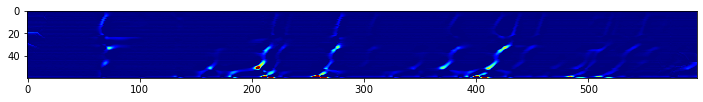

In [18]:
plt.imshow(((fast_T.T)), cmap = 'jet', vmin = fast_q.min() / 25, vmax = fast_q.max() / 25)
#plt.colorbar()

In [19]:
patterns.mean()

3433.502000091011

Fast T / total intensity

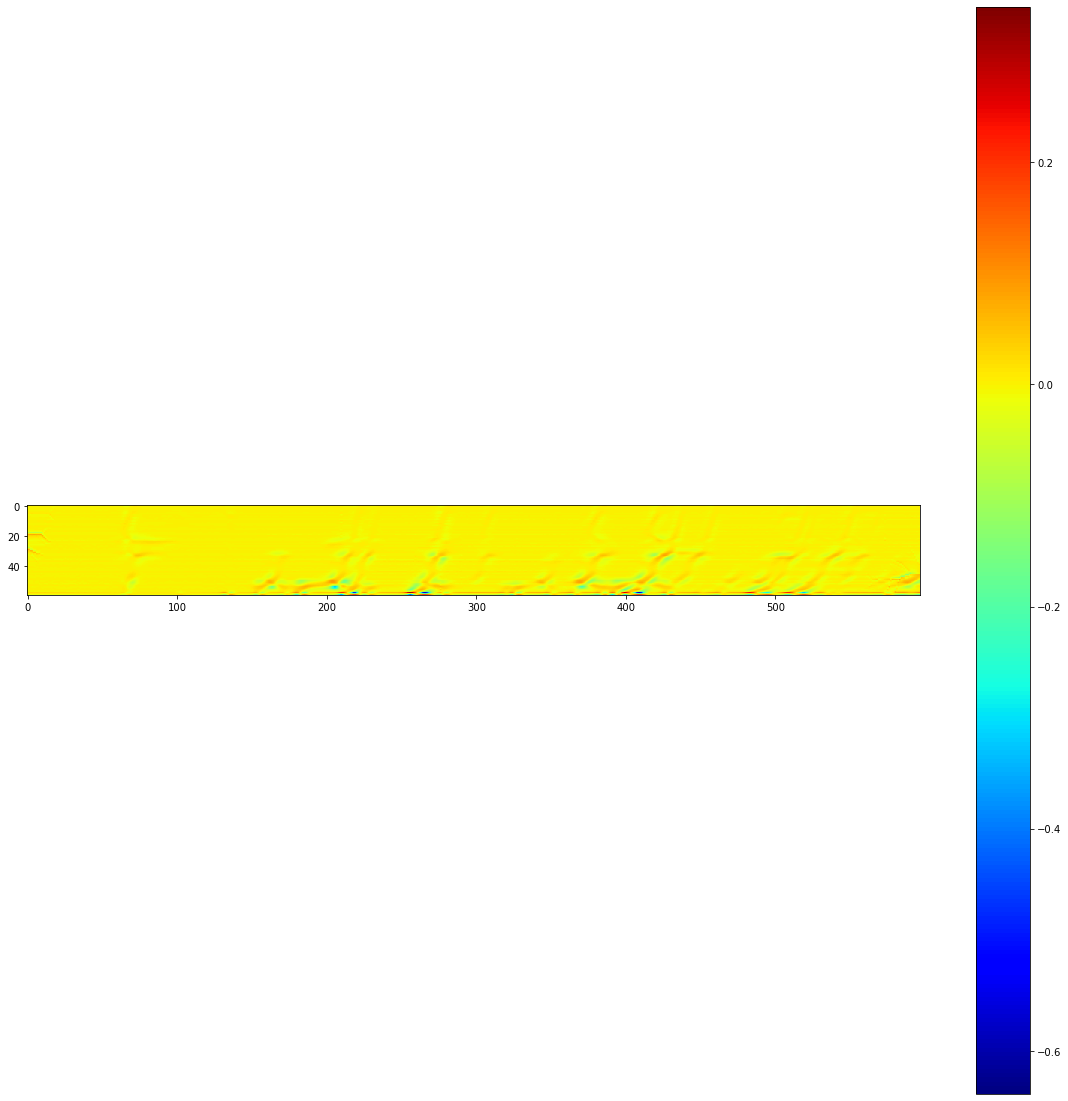

In [201]:
plt.imshow(((fast_T.T) / patterns), cmap = 'jet')#, vmin = fast_q.min() / 25, vmax = fast_q.max() / 25)
plt.colorbar()

Mask high-signal intensity regions. Red corresponds to 2% intensity relative to the total signal.

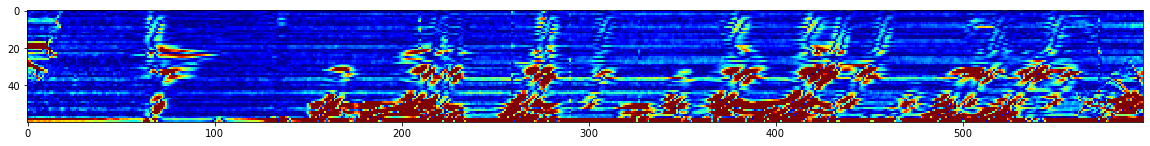

In [215]:
deviations = np.abs((fast_T.T) / (patterns + 1e-9))

deviations2 = deviations.copy()
plt.imshow(np.log(1+deviations2), cmap = 'jet', interpolation = 'none', vmax = .02)
#plt.colorbar()

In [125]:
deviations2.max()

0.38039934011016596

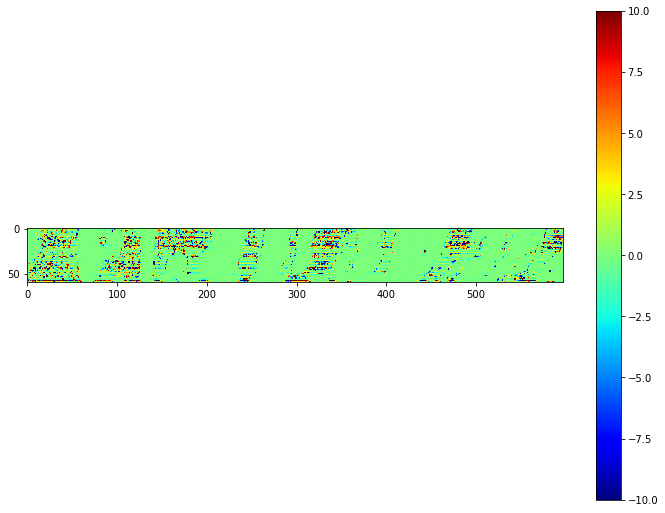

In [78]:
plt.imshow(((fast_T.T / slow_T.T)), cmap = 'jet', vmin = -10, vmax = 10)
plt.colorbar()

Text(0.5, 1.0, 'High-T distribution')

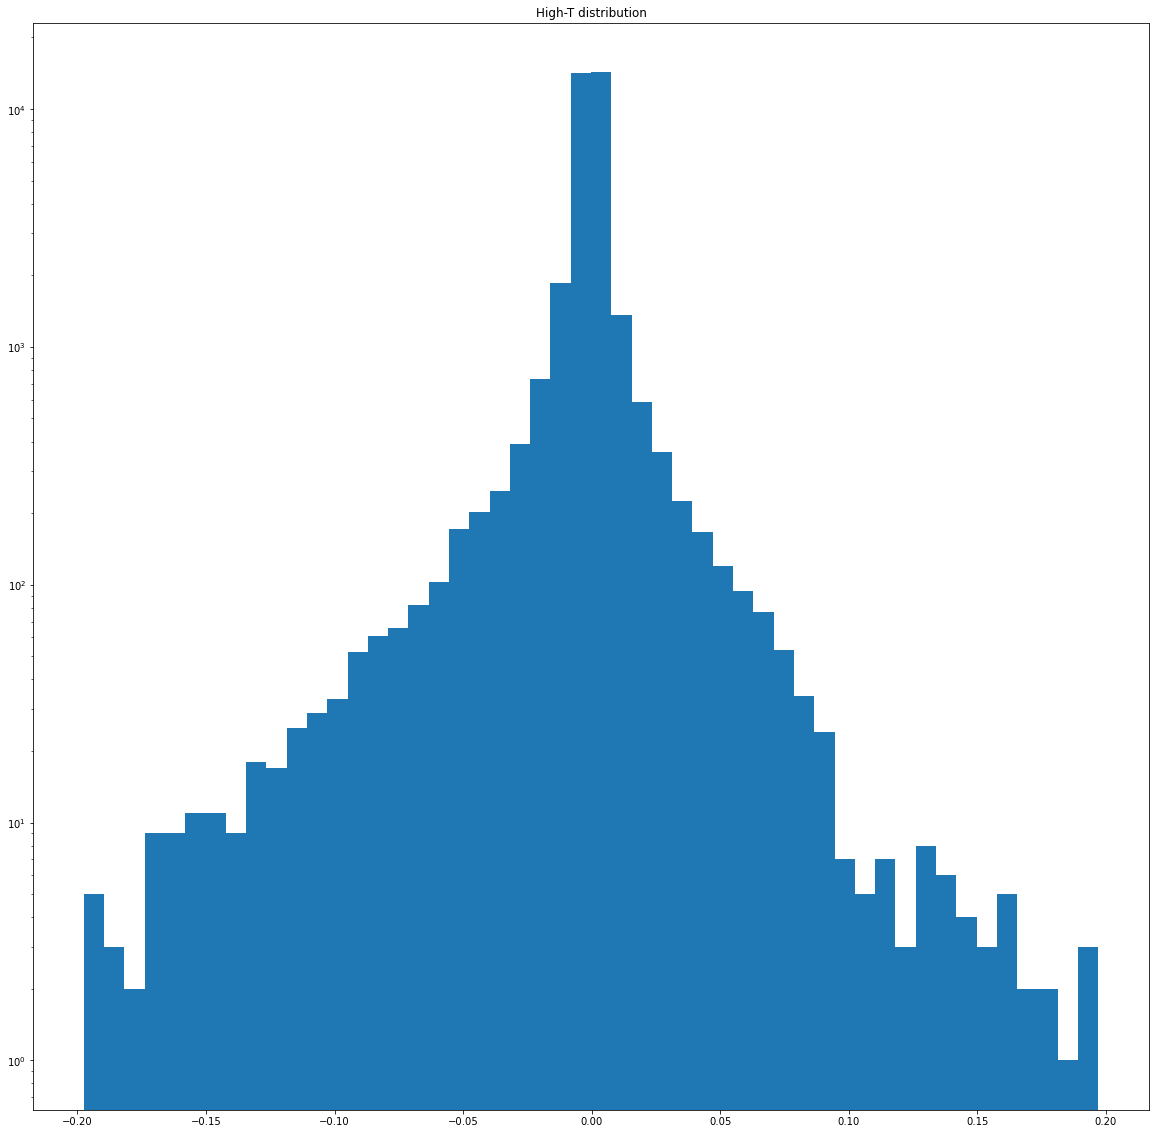

In [213]:
tmp = ((fast_T.T / patterns).ravel())
tmp = tmp[((tmp < .2) & (tmp > -.2))]
# tmp[tmp < 20] = 0
#tmp[tmp > 20] = 0
plt.hist(tmp, bins = 50);
plt.semilogy()
plt.title('High-T distribution')

In [360]:
intensities = patterns.ravel()
# intensities = patterns[:20, 50:400].ravel()
# intensities = slow_T.T[:20, 50:400].ravel()
# intensities = slow_T.T.ravel()

In [369]:
# absolute deviation
noise = np.abs(fast_T.T.ravel())
# noise = fast_T.T[:20, 50:400].ravel()
# noise = fast_T.T.ravel()

In [370]:
sorter = np.argsort(intensities)

[]

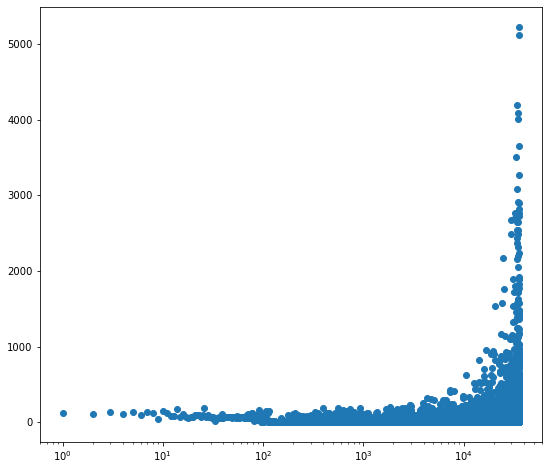

In [371]:
plt.plot(noise[sorter], 'o')
plt.semilogx()

In [372]:
nsplit = 30
splitsort = np.split(sorter, nsplit)
splitintensity = [(intensities[idxs]).ravel().mean() for idxs in splitsort]

In [373]:
# mean absolute values of the high-T noise
splitmean = [np.abs(noise[idxs]).ravel().mean() for idxs in splitsort]
splitstd = [(noise)[idxs].std() for idxs in splitsort]

In [280]:
%matplotlib notebook

In [374]:
logsplitintensity, logsplitstd = np.log10(splitintensity), np.log10(splitstd)

[]

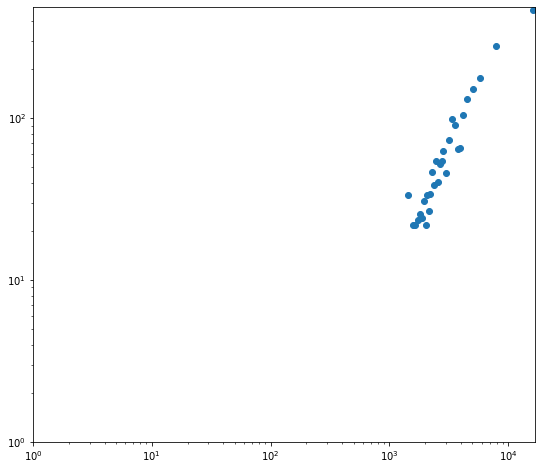

In [375]:
plt.rcParams["figure.figsize"]=(9, 8)
#plt.plot(splitintensity, splitmean, 'o')
plt.plot(splitintensity, splitstd, 'o')
plt.xlim(1, None)
plt.ylim(1, None)
#plt.plot(splitstd, 'o')
plt.semilogx()
plt.semilogy()

In [283]:
(np.log10(3770) - np.log10(1915)) / (np.log10(86.9)  - np.log10(25.4))

0.5506930899609576

In [376]:
from scipy.optimize import curve_fit

(0.0, 2.0015057784771293)

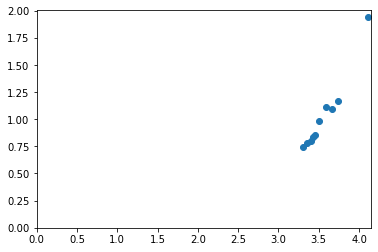

In [325]:
%matplotlib inline
plt.plot(logsplitintensity, logsplitstd, 'o')
plt.xlim(0, None)
plt.ylim(0, None)

In [348]:
logsplitintensity

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       -0.14371509,  0.31963676,  0.64774851,  0.94605029,  1.25740897,
        1.53335082,  1.77756545,  1.98455362,  2.16477455,  2.33155947,
        2.48123401,  2.62553965,  2.77070522,  2.90339316,  3.03228805,
        3.15804156,  3.30205018,  3.46464725,  3.72704333,  4.12120982])

In [377]:
# curve_fit(lambda x, a, b: a + b * x, logsplitintensity[5:-5], logsplitstd[5:-5])
curve_fit(lambda x, a, b: a + b * x, logsplitintensity[17:], logsplitstd[17:])

(array([-2.67547914,  1.29106279]),
 array([[ 0.26418186, -0.07204389],
        [-0.07204389,  0.01970491]]))

{\displaystyle \operatorname {E} [|X-\lambda |]={\frac {2\lambda ^{\lfloor \lambda \rfloor +1}e^{-\lambda }}{\lfloor \lambda \rfloor !}}.}

In [389]:
np.power?

In [397]:
import scipy

In [398]:
def mad(lam):
    return 2 * np.exp(-lam) * np.power(lam, (np.floor(lam) + 1)) /  scipy.special.factorial(np.floor(lam))

In [396]:
np.math.factorial([1, 2])

TypeError: an integer is required (got type list)

In [403]:
gridlam = np.arange(1, 140)

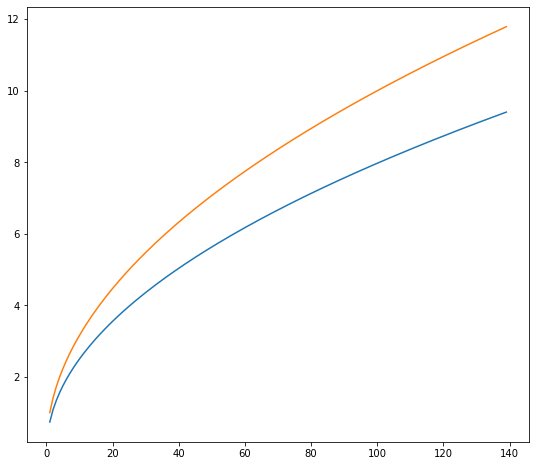

In [405]:
plt.plot(gridlam, mad(gridlam))
plt.plot(gridlam, np.sqrt(gridlam))

## Uncertainty propagation

In [137]:
def default_featurize(patterns_pp):
    #patterns_pp = gf(patterns, (1, 1.7))
    labeled, feature_masks, activations, norm_, activations_n1 = feat.get_ridge_features(
        patterns_pp,
       smooth_ax1 = 'FWHM', smooth_ax0 = 2, threshold_percentile = 50, thicken = True, size_thresh = 10, bgsub=False,
        log_scale_features = False, fwhm_finder=feat.fwhm_finder, do_flood_thicken = False, max_size_flood = 20,
        thicken_ax0 = 1, thicken_ax1 = 1, flood_threshold=.95, smooth_factor_ax1 = .125)
    return labeled, feature_masks, activations, norm_, activations_n1

In [146]:
patterns_pp = slow_T.T.copy()
patterns_pp[patterns_pp < 0] = 0

Peak at 69, start iteration with error = 0.7072165695964187
Peak at 69, iteration 0: error = 213.9948301635603
Peak at 68, start iteration with error = 0.6221062553786476
Peak at 68, iteration 0: error = 241.56778804636477
Peak at 276, start iteration with error = 0.7052741702394918
Peak at 276, iteration 0: error = 156.54568174553464
Peak at 276, start iteration with error = 0.6357880514720367
Peak at 276, iteration 0: error = 280.61456147523717
Peak at 210, start iteration with error = 0.6384400255610315
Peak at 210, iteration 0: error = 320.5247499395546
Peak at 207, start iteration with error = 0.6880617523120018
Peak at 207, iteration 0: error = 249.247783235442
29
0.05383870857789993


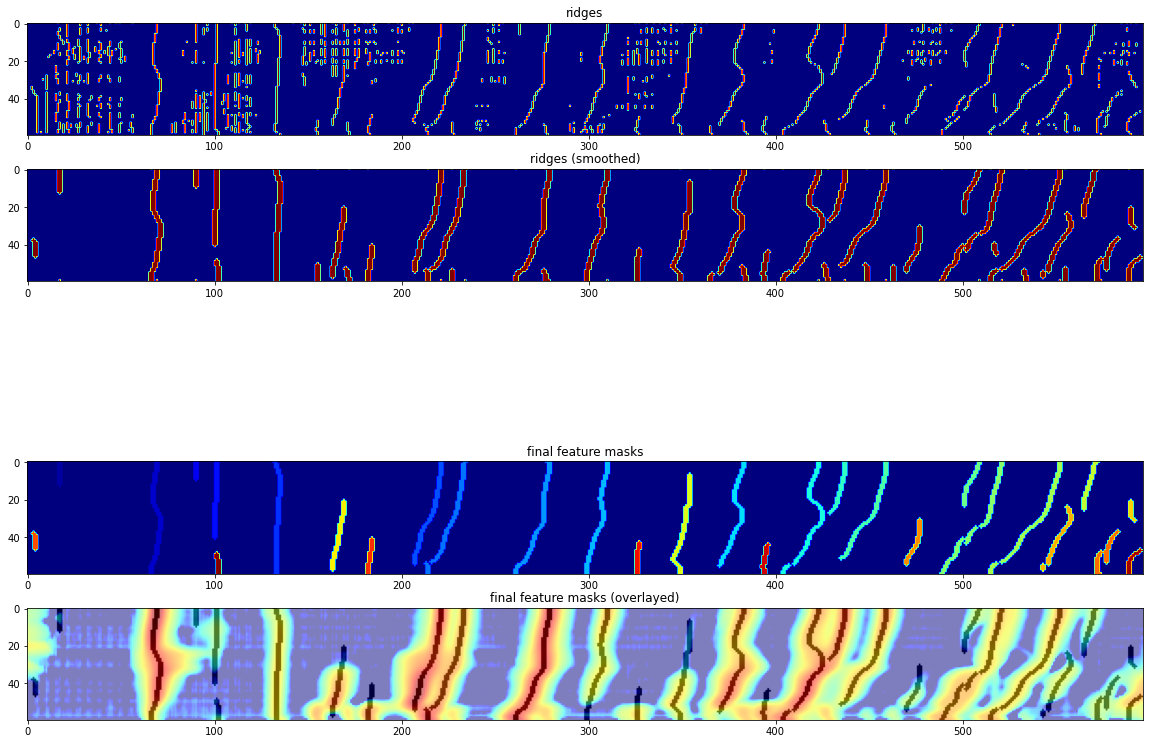

In [147]:
labeled, feature_masks, activations, _norm, activations_n1 = default_featurize(patterns_pp);

In [148]:
patterns_pp.min()

0.0

{'linkage': 'ward', 'affinity': 'euclidean'}



    Similarity type: Cosine

    Scaling: linear
    
    Clustering type: agglom
    
    Linkage: ward
    

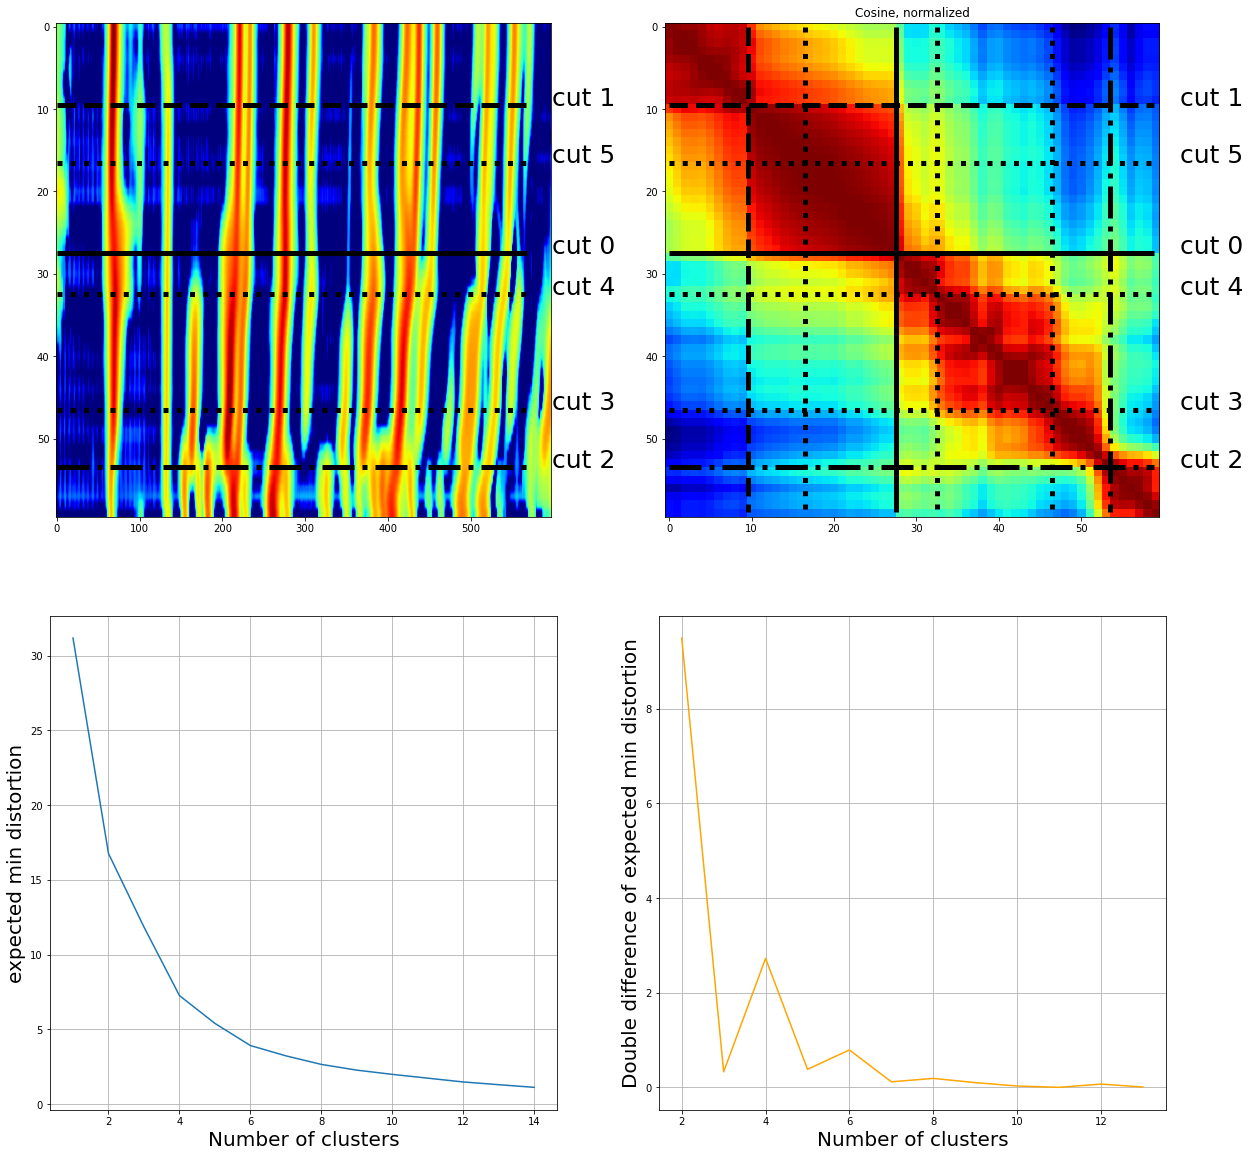

In [151]:
results = []

simtype = 'Cosine'
scaling = 'linear'
linkage = 'ward'
ctype = 'agglom'

feature_csims1, o_cuts = feat.sims_with_boundaries(patterns_pp, activations_n1, activations_n1, n = 7, simtype = simtype, extra_label='',
                    ctype = ctype, linkage = linkage, affinity = 'euclidean')
results.append({'simtype': simtype, 'scaling': scaling, 'linkage': linkage, 'ctype': ctype, 'cut_coords': o_cuts})
feat.printinfo(simtype, scaling, linkage, ctype)

In [165]:
#activations_noise = feat.featurize(feature_masks, fast_T.T)
activations_noise = feat.featurize(feature_masks, np.percentile(np.abs(fast_T.T), 68) * np.ones_like(fast_T.T))

13.150331371941792
0.05383870857789993
13.150331371941792
13.150331371941792


Text(0.5, 1.0, 'features')

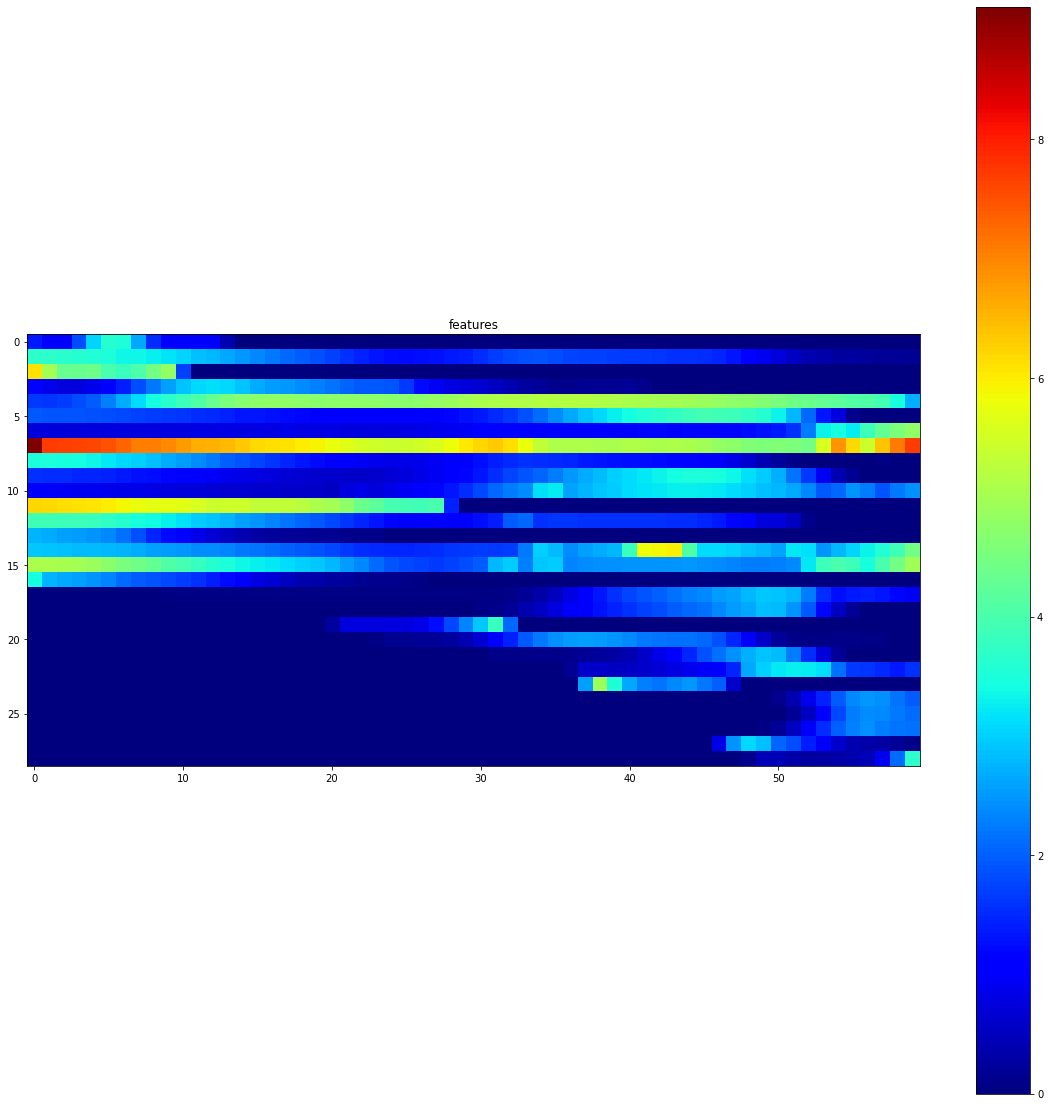

In [176]:
do_norm = True

if do_norm:
    uncertainty = np.abs((_norm(activations + activations_noise) - _norm(activations)))
    fractional_uncertainty = uncertainty / (_norm(activations + activations_noise) + 1e-9)
else:
    uncertainty = np.abs((( activations_noise)))
    fractional_uncertainty = uncertainty / ((activations) + 1e-9)
    
if do_norm:
    plt.imshow(_norm(activations + activations_noise), cmap = 'jet')
else:
    plt.imshow((activations), cmap = 'jet')
plt.colorbar()
plt.title('features')

Text(0.5, 1.0, '')

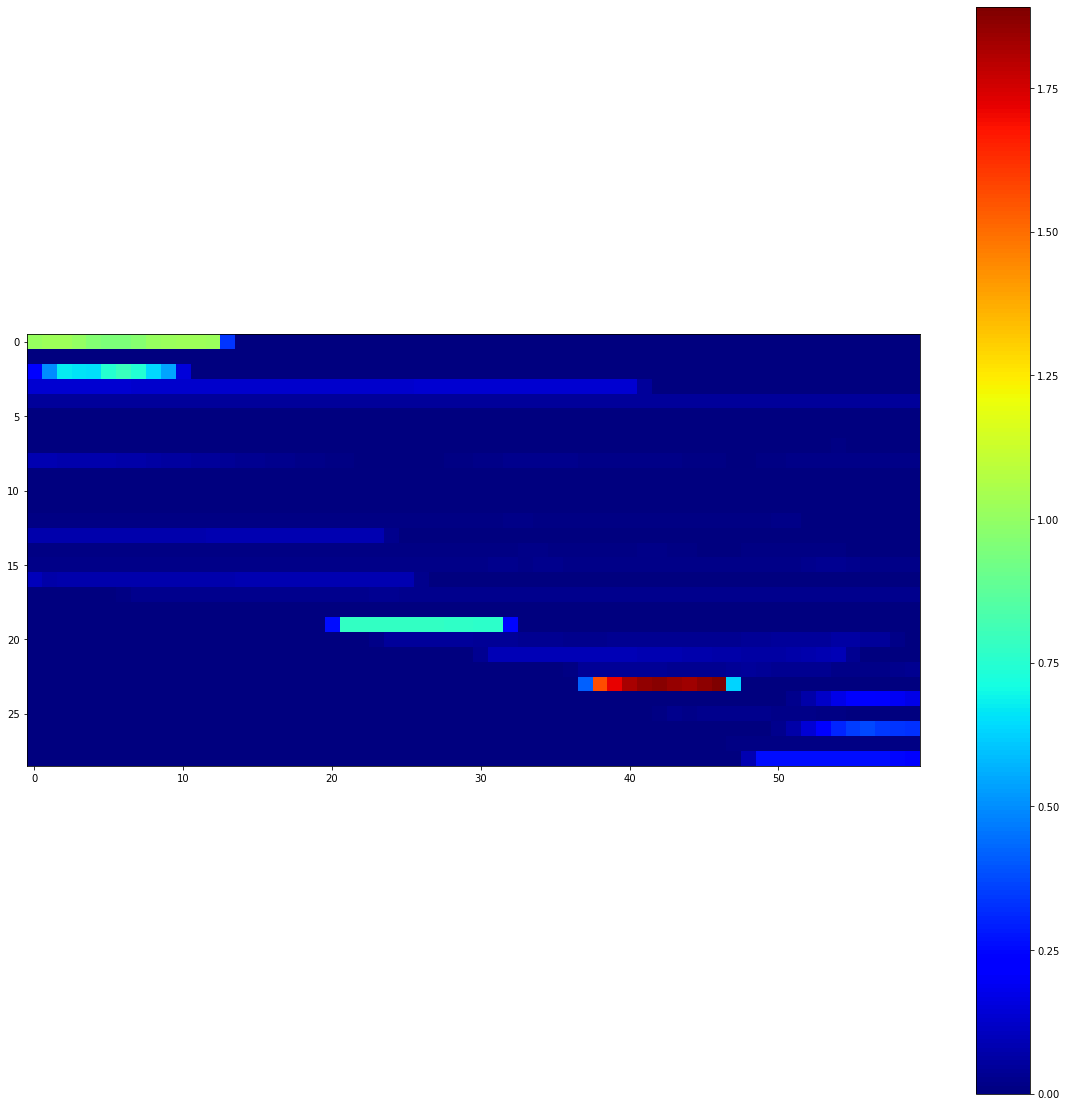

In [177]:
plt.imshow(uncertainty, cmap = 'jet')
plt.colorbar()
plt.title('')

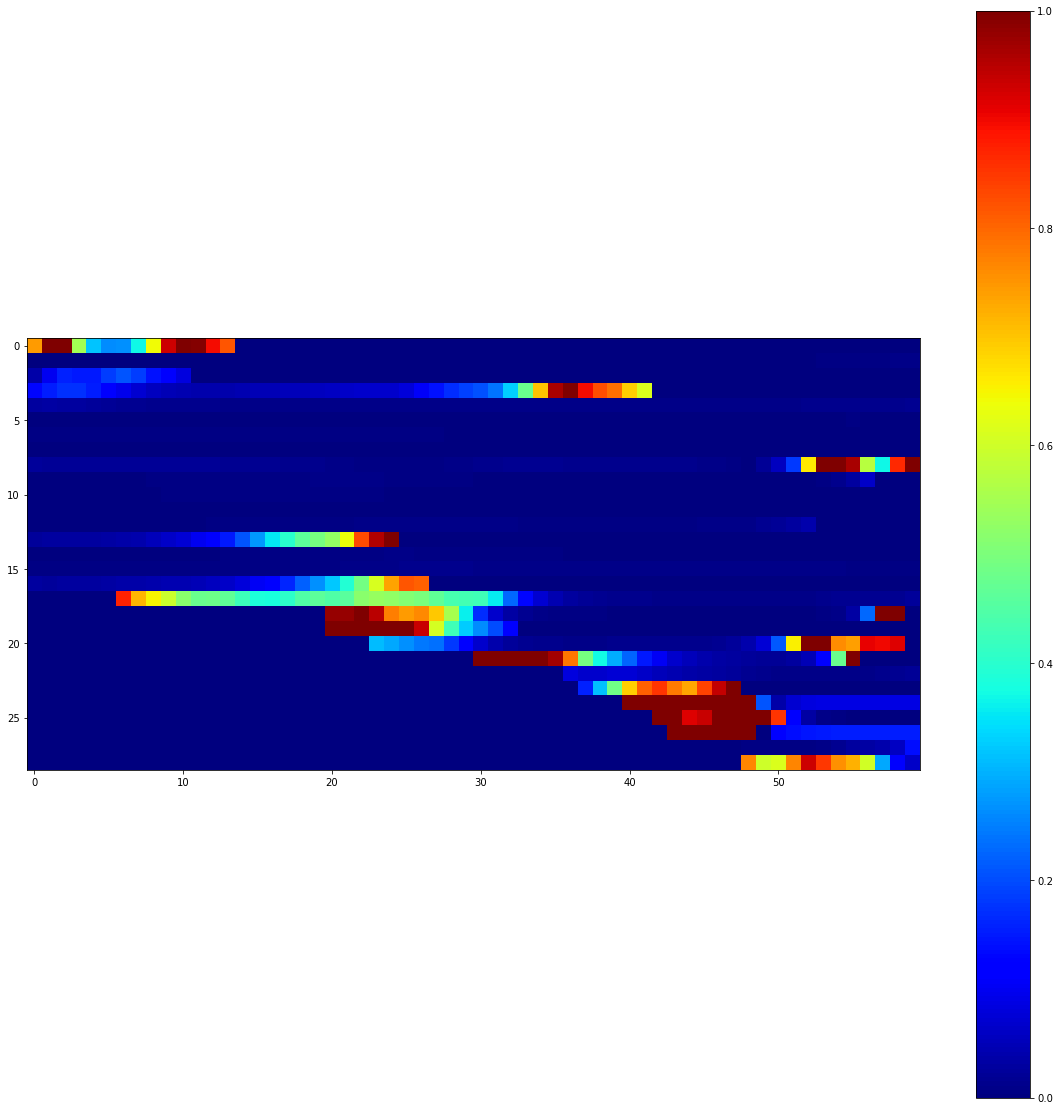

In [178]:
plt.imshow(fractional_uncertainty, cmap = 'jet', vmax = 1)
plt.colorbar()

In [184]:
feature_mask = ~(fractional_uncertainty.max(axis = 1) > .5)

In [192]:
feature_mask.sum()

14

{'linkage': 'ward', 'affinity': 'euclidean'}


Text(0.5, 1.0, 'masked features')

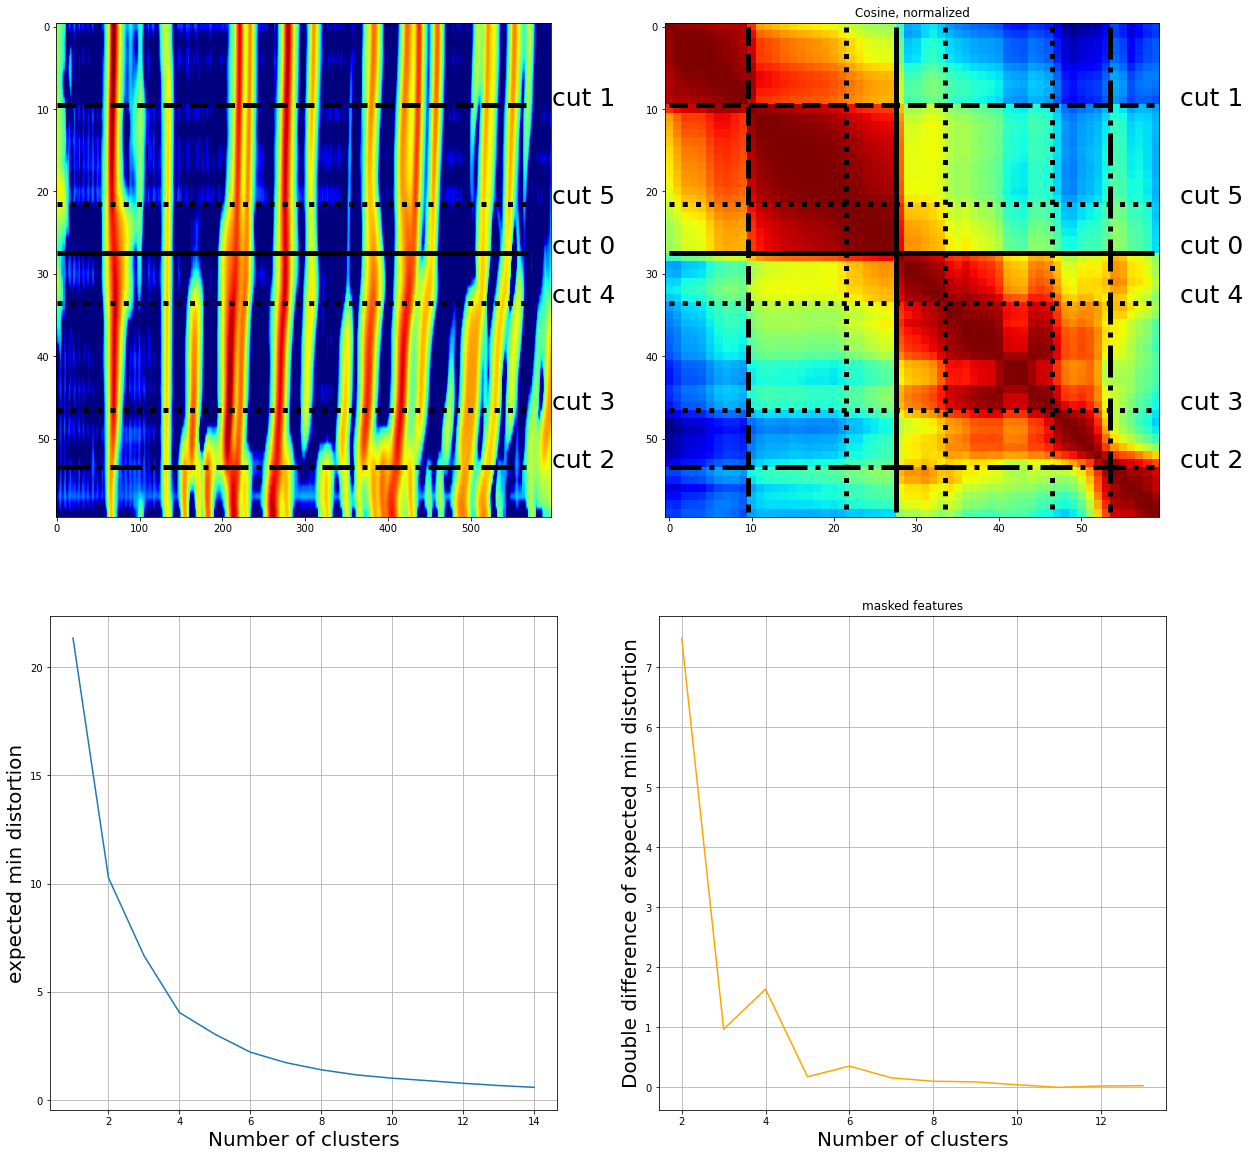

In [194]:
results = []

simtype = 'Cosine'
scaling = 'linear'
linkage = 'ward'
ctype = 'agglom'

feature_csims1, o_cuts = feat.sims_with_boundaries(patterns_pp, activations_n1[feature_mask], activations_n1[feature_mask],
                                                   n = 7, simtype = simtype, extra_label='',
                    ctype = ctype, linkage = linkage, affinity = 'euclidean')
results.append({'simtype': simtype, 'scaling': scaling, 'linkage': linkage, 'ctype': ctype, 'cut_coords': o_cuts})
feat.printinfo(simtype, scaling, linkage, ctype)
plt.title('masked features')

In [191]:
activations_n1[feature_mask].shape

(14, 60)

# 3d dataset

In [ ]:
from xrdc.datas

In [ ]:
slow_q, fast_q, slow_T, fast_T = sep.separate_signal(patterns)